
<br><br>

### Exercícios - Módulo 8

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

 > Considere o dataset abaixo:

In [115]:
import pandas as pd
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


##### Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>

----

 > ### Exercício 1

Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)

In [116]:
import numpy as np
import matplotlib.pyplot as plt

 > Tentativa 1

In [117]:
# A função tem dois parâmetros de entrada: 
# 1- dataframe disponível; 
# 2- percentual do dataset que será disponibilizado para os dados de teste.

def divide_df(df, perc=float):
    df_dividido = np.random.rand(len(df)) < perc
    train = df[df_dividido]
    test = df[~df_dividido]
    return train, test

In [118]:
resultado = divide_df(df=df, perc=0.75)

In [119]:
df_treino = resultado[0]
df_treino

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47
...,...,...,...,...,...
2454,3.0,10.895196,47.005876,1.0,248
2456,4.0,28.222931,46.858543,3.0,18
2457,1.0,13.055995,87.372664,9.0,217
2458,2.0,22.632517,46.170517,6.0,42


In [120]:
df_teste = resultado[1]
df_teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
5,3.0,16.986504,37.977078,4.0,34
7,4.0,34.361866,66.974023,7.0,35
16,4.0,10.474148,44.053256,4.0,199
21,1.0,30.451130,67.584913,7.0,5
24,3.0,6.185048,63.560572,3.0,287
...,...,...,...,...,...
2438,4.0,14.834325,22.008964,5.0,40
2443,5.0,24.295195,63.712845,9.0,128
2445,5.0,12.276408,51.612911,5.0,156
2447,5.0,30.368660,54.512168,6.0,25


##### Percebi que dividiu corretamente, sem repetições

----

 > Tentativa 2

In [121]:
# Criei uma classe para receber os parâmetros, com as funções para gerar o df de treino e o df de teste

class Divide_df:

    def __init__(self, df, perc: float):
        self.df = df
        self.perc = perc


    def treino(self):
        df_dividido = np.random.rand(len(df)) < self.perc
        train = df[df_dividido]
        return train

    def teste(self):
        df_dividido = np.random.rand(len(df)) < self.perc
        test = df[~df_dividido]
        return test


In [122]:
df_crimes = Divide_df(df, 0.75)

In [123]:
df_treino2 = df_crimes.treino()
df_treino2

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47
6,5.0,6.940413,32.146399,2.0,188
7,4.0,34.361866,66.974023,7.0,35
...,...,...,...,...,...
2455,1.0,3.507206,56.070224,1.0,231
2456,4.0,28.222931,46.858543,3.0,18
2457,1.0,13.055995,87.372664,9.0,217
2458,2.0,22.632517,46.170517,6.0,42


In [124]:
df_teste2 = df_crimes.teste()
df_teste2

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
23,3.0,19.368456,49.719918,3.0,106
24,3.0,6.185048,63.560572,3.0,287
29,2.0,32.489255,80.305161,10.0,23
...,...,...,...,...,...
2446,5.0,25.773806,58.707768,9.0,24
2448,3.0,16.722935,94.840307,5.0,369
2451,1.0,13.598088,29.769788,1.0,42
2456,4.0,28.222931,46.858543,3.0,18


##### Dividiu corretamente as proporções, mas percebi repetições de linhas

----

 > ### Exercício 2

#### Parte 1

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 



  >> LinearRegression

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
#instanciando o algoritmo
lm = LinearRegression()
lm

LinearRegression()

 > Escolhi a variável **'perc_pol'** (percentual de policiais ativos na cidade) porque acredito ter uma correlação inversamente proporcional muito forte (quanto maior o percentual policiais ativos na cidade, menor será o número de crimes)

In [127]:
#ajustando os dados para o formato correto

X = df_treino['perc_pol'].values.reshape(-1,1)
y = df_treino['crimes'].values.reshape(-1,1)

In [128]:
type(X), X.shape

(numpy.ndarray, (1870, 1))

In [129]:
type(y), y.shape

(numpy.ndarray, (1870, 1))

In [130]:
#fitando - treinando - o modelo aos dados

lm.fit(X, y)

LinearRegression()

In [131]:
#fazendo predições

ypred = lm.predict(X)
ypred

array([[216.16678087],
       [140.13330027],
       [160.66996744],
       ...,
       [190.32292921],
       [148.16413694],
       [102.80036808]])

In [132]:
# Funções para cálculo do MSE e do RMSE

def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [133]:
# Cálculo do RMSE para o modelo de regressão de liner simples e, na sequência, gráfico com a reta criada a partir do modelo

RMSE(y = y, y_pred = ypred)

109.85643174748098

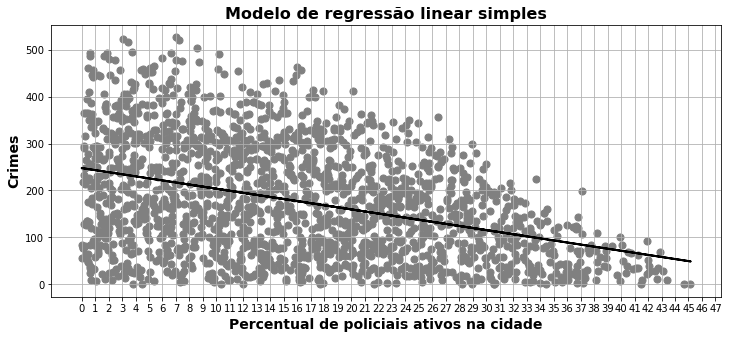

In [134]:
plt.figure(figsize=[12,5])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 50, c = 'gray')
plt.xlabel("Percentual de policiais ativos na cidade", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,80))

plt.plot(X, ypred, c = 'black', lw = 2)
plt.grid()

In [135]:
lm.intercept_, lm.coef_

(array([247.79943289]), array([[-4.40230741]]))

  >> KNeighborsRegressor

In [136]:
from sklearn.neighbors import KNeighborsRegressor

In [137]:
df_treino

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47
...,...,...,...,...,...
2454,3.0,10.895196,47.005876,1.0,248
2456,4.0,28.222931,46.858543,3.0,18
2457,1.0,13.055995,87.372664,9.0,217
2458,2.0,22.632517,46.170517,6.0,42


In [138]:
X = df_treino['perc_pol'].values.reshape(-1,1)
y = df_treino['crimes'].values

In [139]:
lm

LinearRegression()

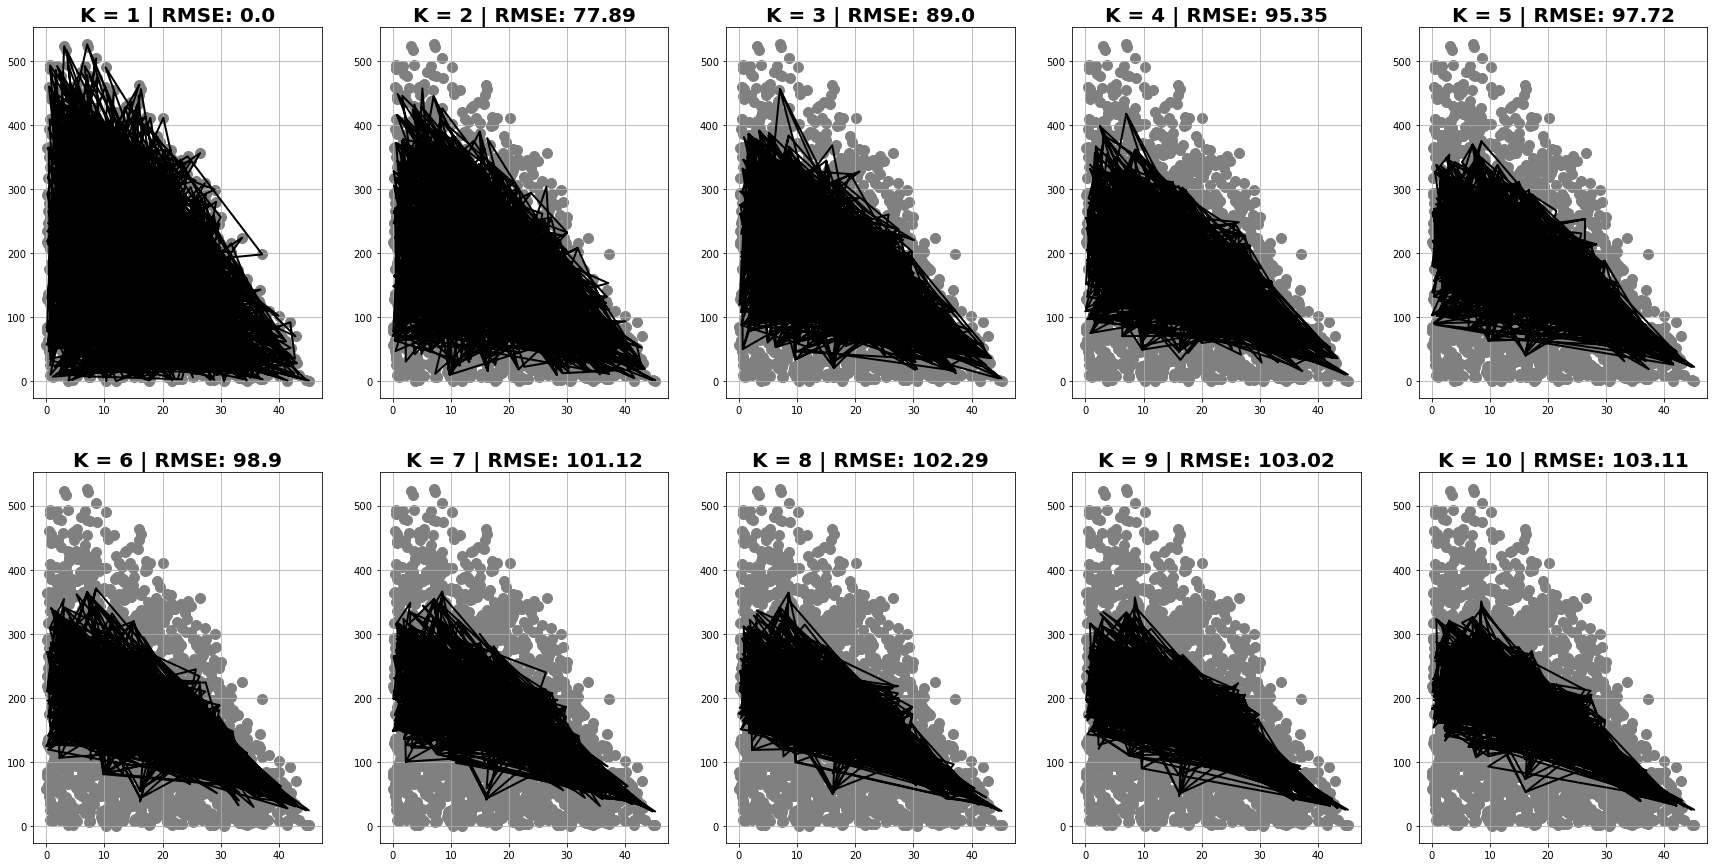

In [140]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

In [141]:
#Dataset treino
df_treino.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


In [142]:
#Dataset teste
df_teste.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
5,3.0,16.986504,37.977078,4.0,34
7,4.0,34.361866,66.974023,7.0,35
16,4.0,10.474148,44.053256,4.0,199
21,1.0,30.451130,67.584913,7.0,5
24,3.0,6.185048,63.560572,3.0,287


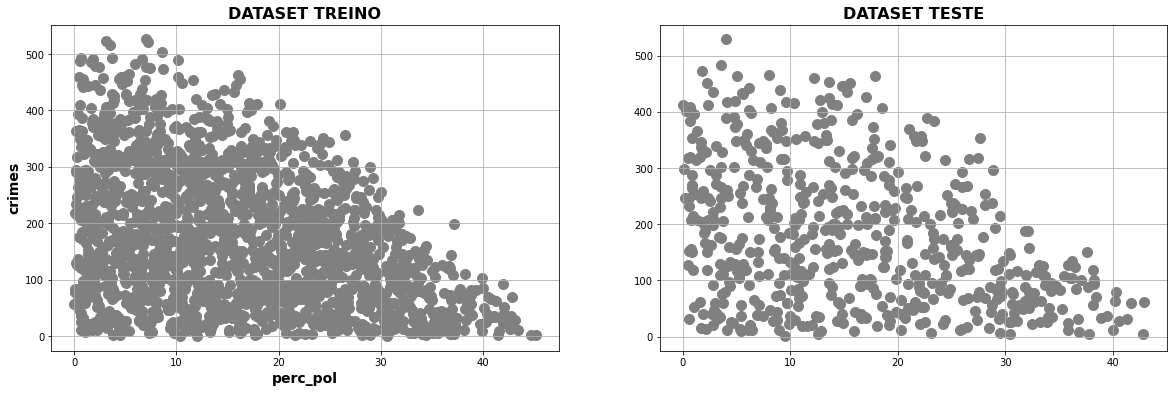

In [143]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("DATASET TREINO", fontsize = 16, fontweight = 'bold')
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 100, c = 'gray')
plt.grid()
plt.xlabel("perc_pol", fontsize = 14, fontweight = 'bold')
plt.ylabel("crimes", fontsize = 14, fontweight = 'bold')
plt.subplot(1,2,2)
plt.title("DATASET TESTE", fontsize = 16, fontweight = 'bold')
plt.scatter(df_teste['perc_pol'], df_teste['crimes'], s = 100, c = 'gray')
plt.grid()
plt.show()

In [144]:
def plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_teste = modelo.predict(Xteste)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_teste = np.round(RMSE(y = yteste, y_pred = predicao_dataset_teste), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 100)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TESTE: " + str(rmse_dataset_teste),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xteste, yteste, c = 'gray', s = 100)
    plt.plot(Xteste, predicao_dataset_teste, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [145]:
X = df_treino['perc_pol'].values.reshape(-1,1)
y = df_treino['crimes'].values
Xteste = df_teste['perc_pol'].values.reshape(-1,1)
yteste = df_teste['crimes'].values

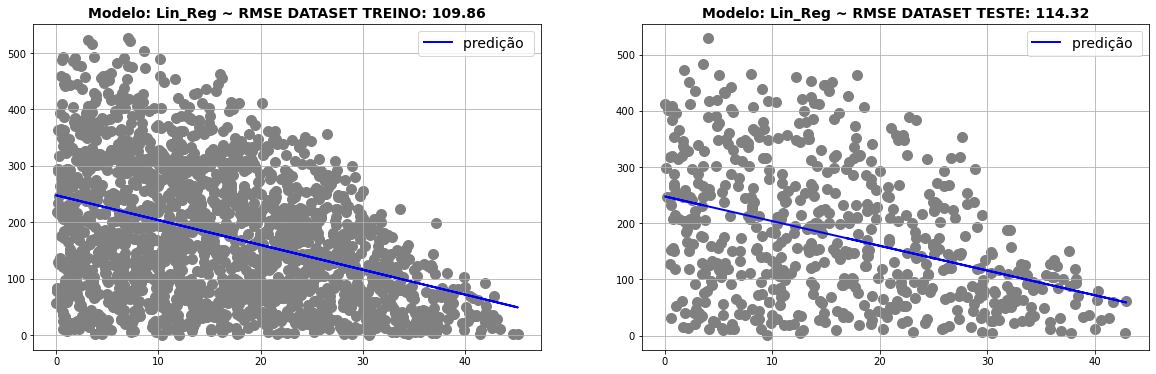

In [146]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

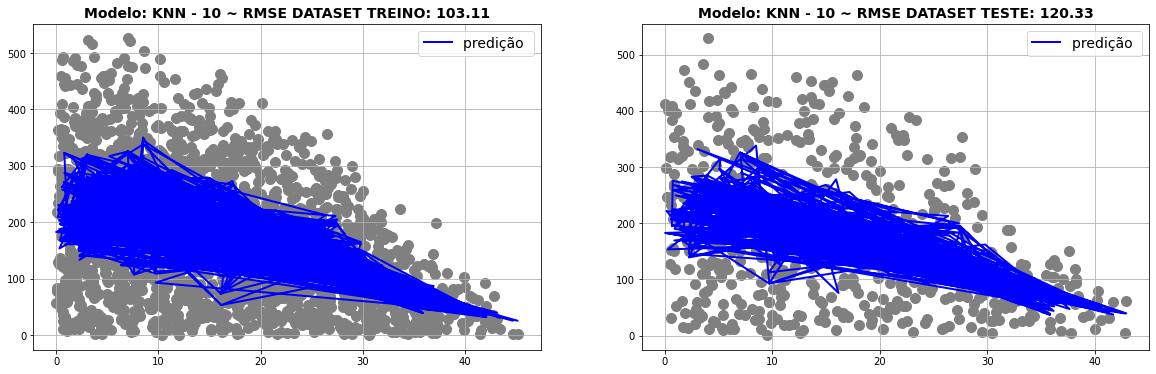

In [147]:
modelo = KNeighborsRegressor(n_neighbors = 10)
nome_modelo = 'KNN - 10'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

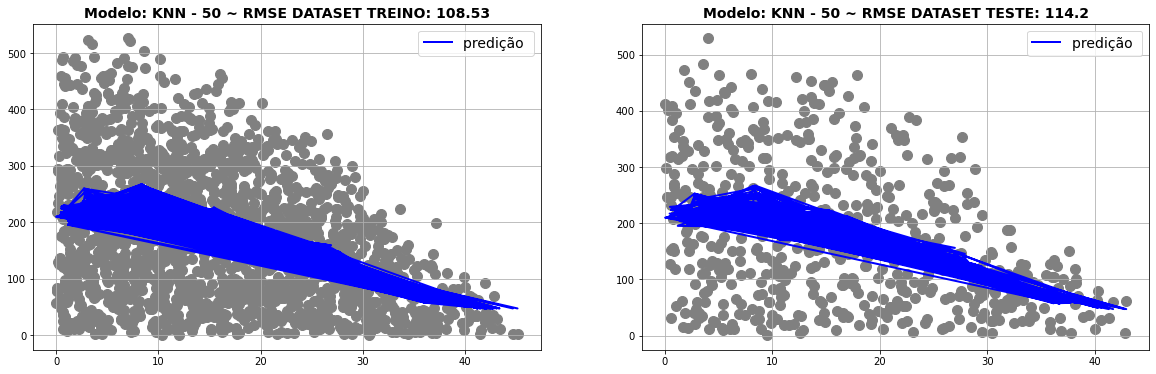

In [148]:
modelo = KNeighborsRegressor(n_neighbors = 50)
nome_modelo = 'KNN - 50'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

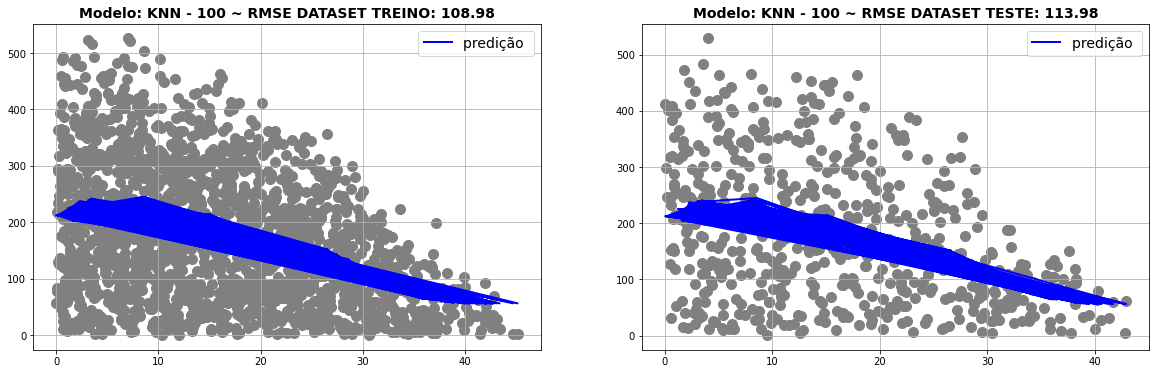

In [149]:
modelo = KNeighborsRegressor(n_neighbors = 100)
nome_modelo = 'KNN - 100'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

### CONCLUSÃO:
No caso da **regressão linear**, vemos uma leve variação do RMSE no dataset de teste, mas os valores são similares:
 - RMSE no dataset de treinamento: 110.55
 - RMSE no dataset de teste: 111.96

Além disso, fica evidente que a reta de regressão ainda descreve os dados de teste, mesmo tendo sido treinada apenas no dataset de treinamento.


Quanto aos resultados para versões do **KNN - Regressor**: Fica claro que este modelo não está sofrendo de overfitting, contudo o modelo com pelo menos 100 vizinhos é o preferível para modelar esses dados.

-----

 > ### Exercício 2

#### Parte 2

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.

   > Variável 'nivel_ed' (Nível educacional médio da cidade)
    
   - LinearRegression

In [150]:
X = df_treino['nivel_ed'].values.reshape(-1,1)
y = df_treino['crimes'].values.reshape(-1,1)

In [151]:
lm.fit(X, y)

LinearRegression()

In [152]:
ypred = lm.predict(X)

In [153]:
RMSE(y = y, y_pred = ypred)

116.78014881194282

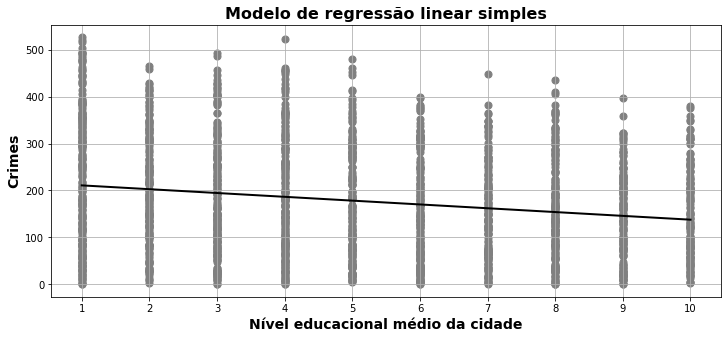

In [154]:
plt.figure(figsize=[12,5])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(df_treino['nivel_ed'], df_treino['crimes'], s = 50, c = 'gray')
plt.xlabel("Nível educacional médio da cidade", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,80))

plt.plot(X, ypred, c = 'black', lw = 2)
plt.grid()

In [155]:
lm.intercept_, lm.coef_

(array([219.00552453]), array([[-8.11470818]]))

   > Variável 'nivel_ed' (Nível educacional médio da cidade)
    
   - KNeighborsRegressor

In [156]:
X = df_treino['nivel_ed'].values.reshape(-1,1)
y = df_treino['crimes'].values

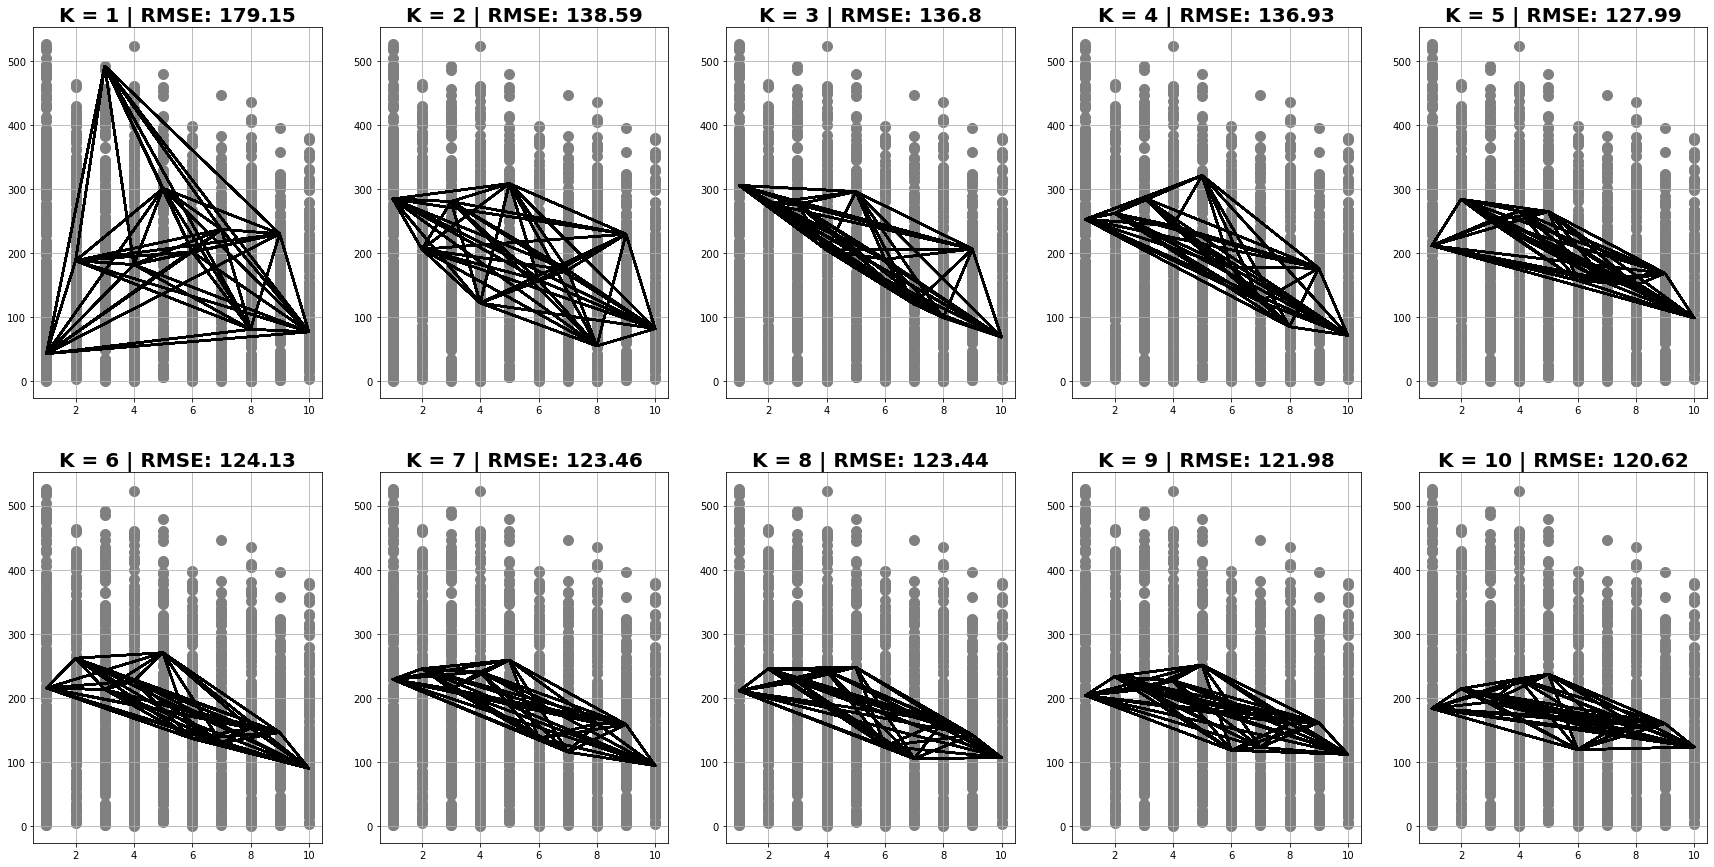

In [157]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df_treino['nivel_ed'], df_treino['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

In [158]:
X = df_treino['nivel_ed'].values.reshape(-1,1)
y = df_treino['crimes'].values
Xteste = df_teste['nivel_ed'].values.reshape(-1,1)
yteste = df_teste['crimes'].values

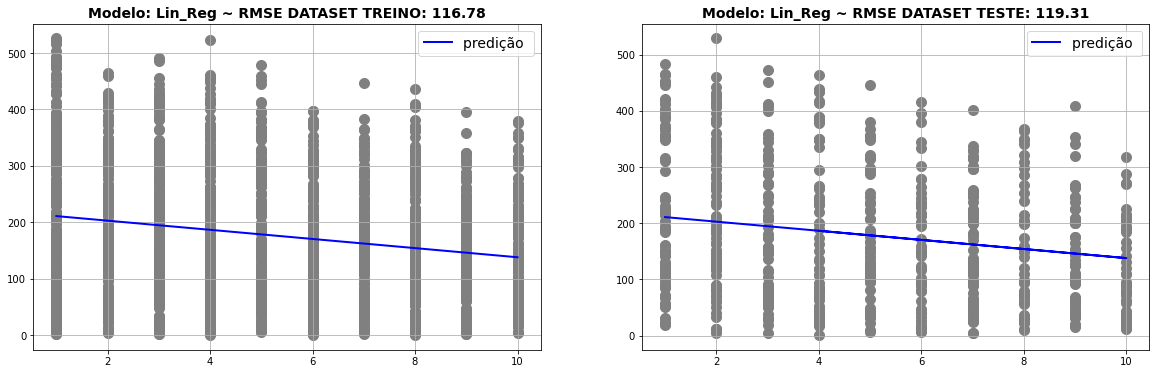

In [159]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

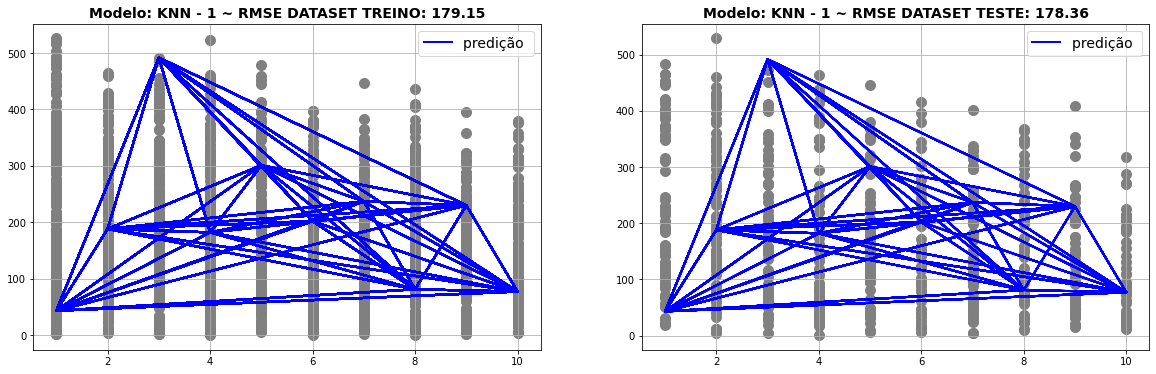

In [160]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

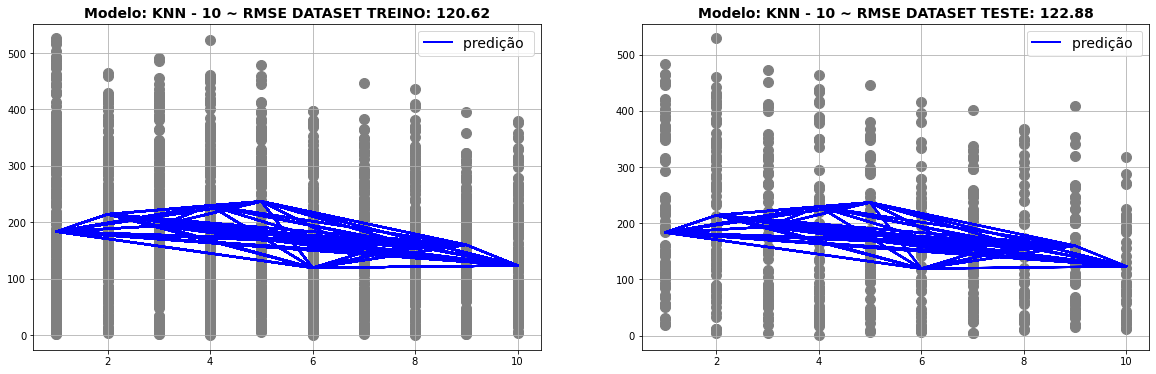

In [161]:
modelo = KNeighborsRegressor(n_neighbors = 10)
nome_modelo = 'KNN - 10'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

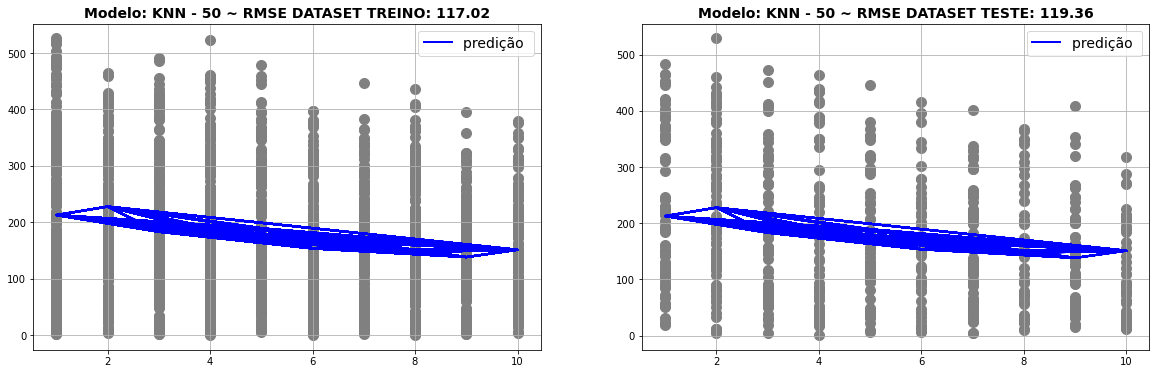

In [163]:
modelo = KNeighborsRegressor(n_neighbors = 50)
nome_modelo = 'KNN - 50'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

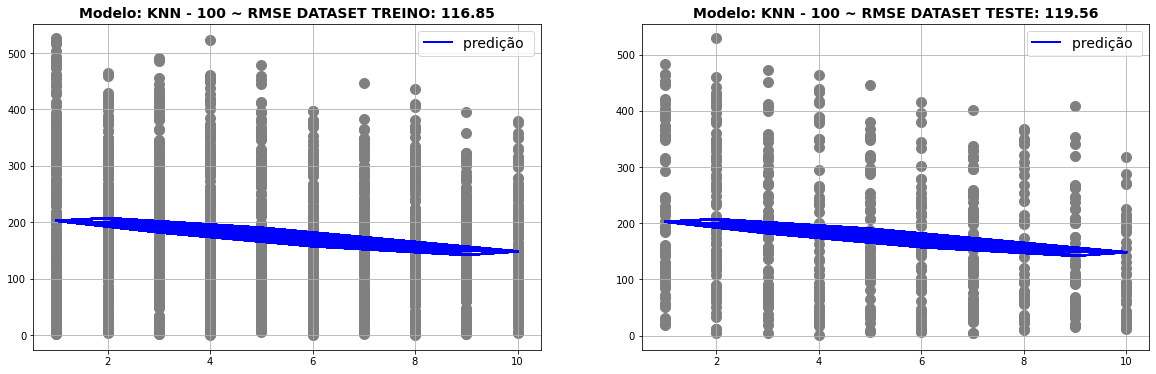

In [164]:
modelo = KNeighborsRegressor(n_neighbors = 100)
nome_modelo = 'KNN - 100'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

   > Variável 'taxa_crim' (taxa de criminalidade histórica da cidade)
    
   - LinearRegression

In [165]:
X = df_treino['taxa_crim'].values.reshape(-1,1)
y = df_treino['crimes'].values.reshape(-1,1)

In [166]:
lm.fit(X, y)

LinearRegression()

In [167]:
ypred = lm.predict(X)

In [168]:
RMSE(y = y, y_pred = ypred)

96.8208201689507

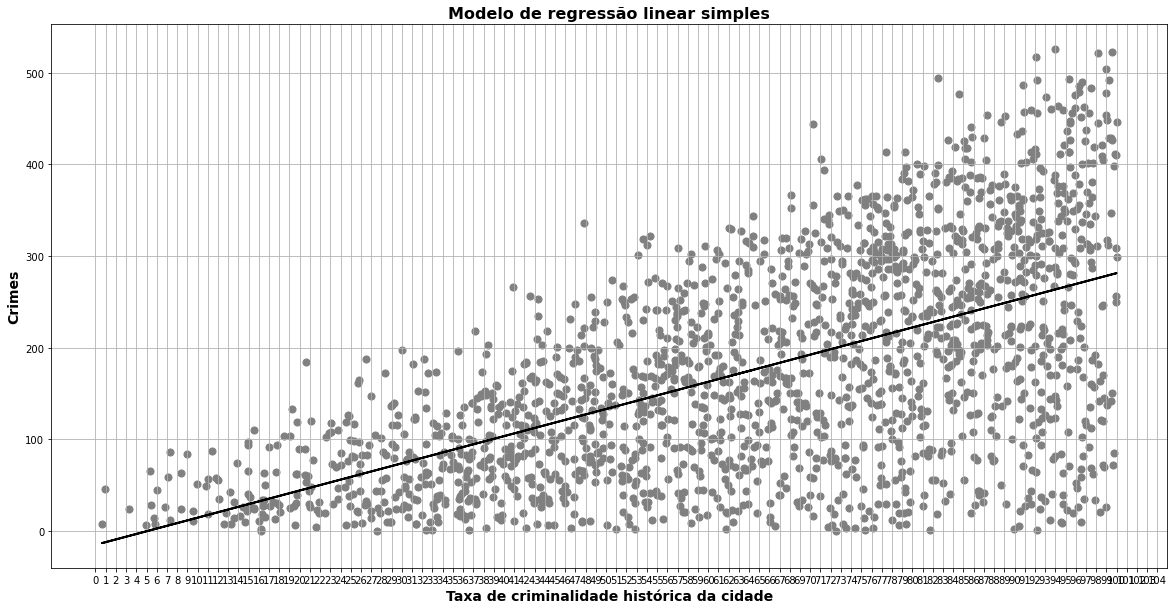

In [189]:
plt.figure(figsize=[20,10])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(df_treino['taxa_crim'], df_treino['crimes'], s = 50, c = 'gray')
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,200))

plt.plot(X, ypred, c = 'black', lw = 2)
plt.grid()

In [190]:
lm.intercept_, lm.coef_

(array([-15.26249825]), array([[2.96551528]]))

   > Variável 'taxa_crim' (taxa de criminalidade histórica da cidade)
    
   - KNeighborsRegressor

In [191]:
X = df_treino['taxa_crim'].values.reshape(-1,1)
y = df_treino['crimes'].values

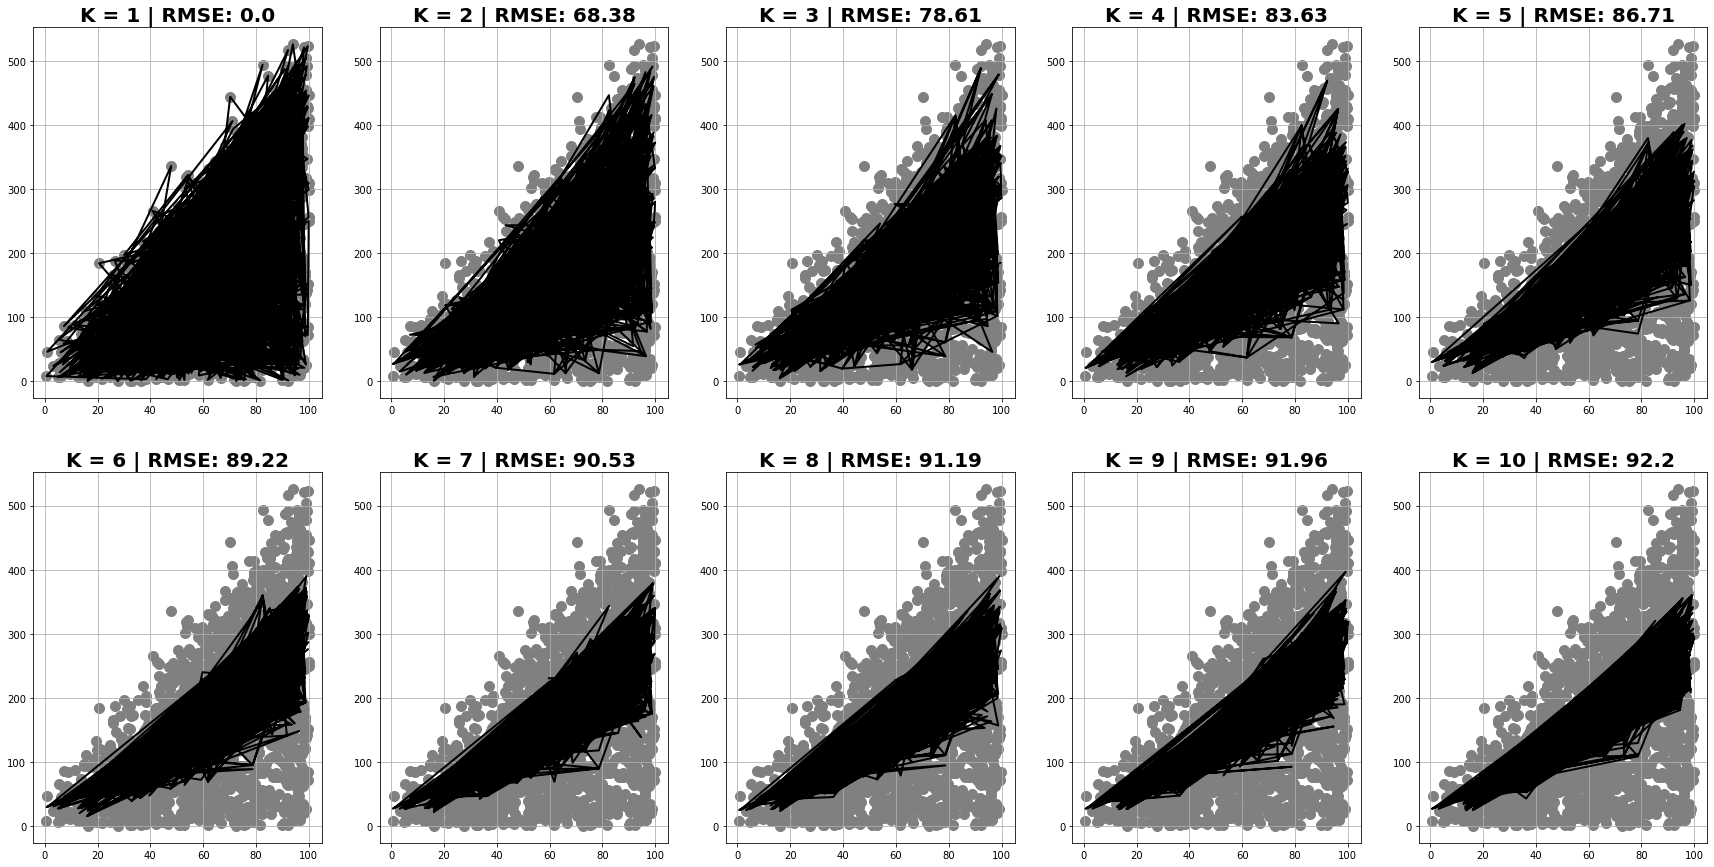

In [192]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df_treino['taxa_crim'], df_treino['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

In [193]:
X = df_treino['taxa_crim'].values.reshape(-1,1)
y = df_treino['crimes'].values
Xteste = df_teste['taxa_crim'].values.reshape(-1,1)
yteste = df_teste['crimes'].values

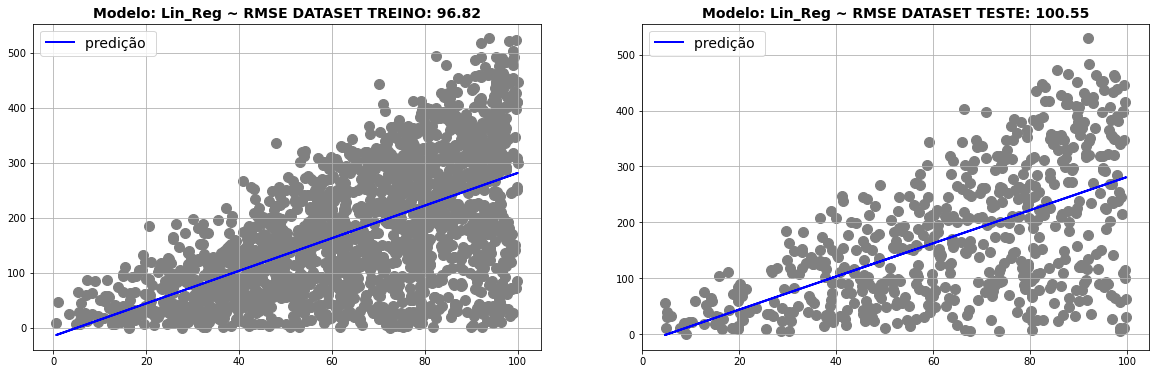

In [194]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

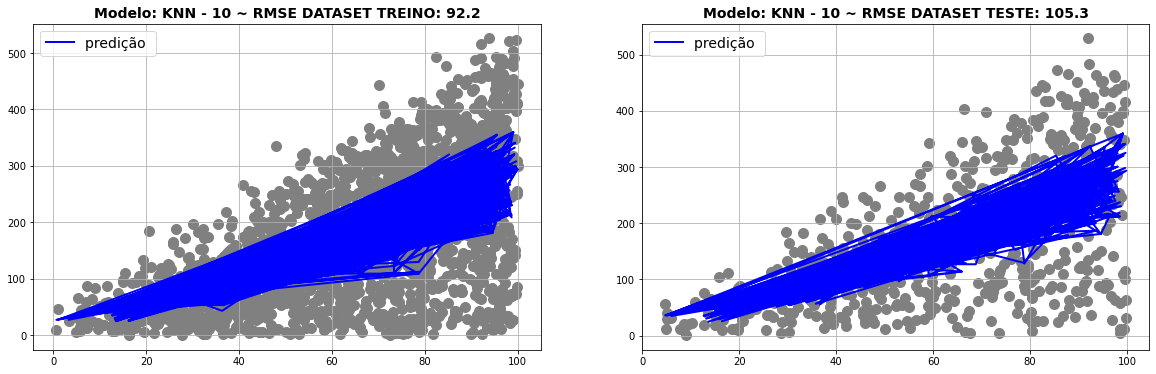

In [196]:
modelo = KNeighborsRegressor(n_neighbors = 10)
nome_modelo = 'KNN - 10'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

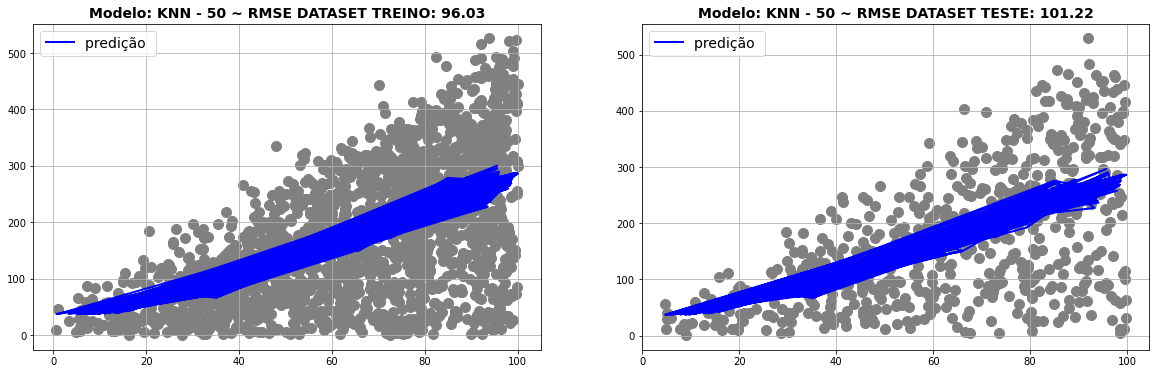

In [197]:
modelo = KNeighborsRegressor(n_neighbors = 50)
nome_modelo = 'KNN - 50'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

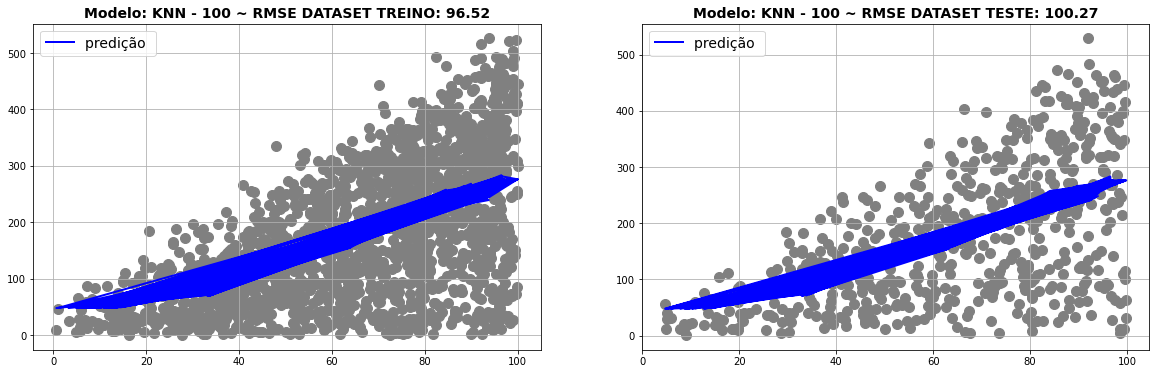

In [198]:
modelo = KNeighborsRegressor(n_neighbors = 100)
nome_modelo = 'KNN - 100'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

   > Variável 'ind_pop_cid' (índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidade)
    
   - LinearRegression

In [201]:
X = df_treino['ind_pop_cid'].values.reshape(-1,1)
y = df_treino['crimes'].values.reshape(-1,1)

In [202]:
lm.fit(X, y)

LinearRegression()

In [203]:
ypred = lm.predict(X)

In [204]:
RMSE(y = y, y_pred = ypred)

118.89272144222772

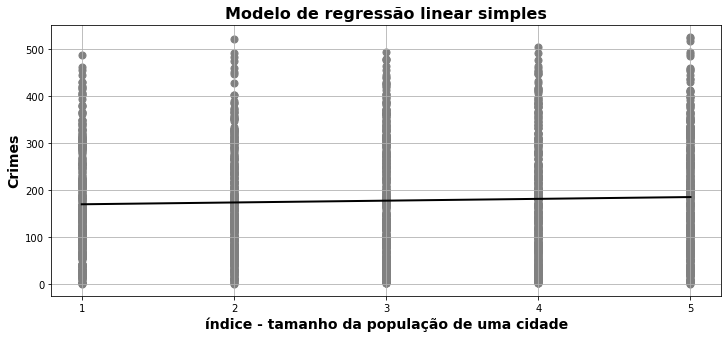

In [206]:
plt.figure(figsize=[12,5])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(df_treino['ind_pop_cid'], df_treino['crimes'], s = 50, c = 'gray')
plt.xlabel("índice - tamanho da população de uma cidade", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,80))

plt.plot(X, ypred, c = 'black', lw = 2)
plt.grid()

In [205]:
lm.intercept_, lm.coef_

(array([165.74504198]), array([[3.84728944]]))

   > Variável 'ind_pop_cid' (índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidade)
    
   - KNeighborsRegressor

In [207]:
X = df_treino['ind_pop_cid'].values.reshape(-1,1)
y = df_treino['crimes'].values

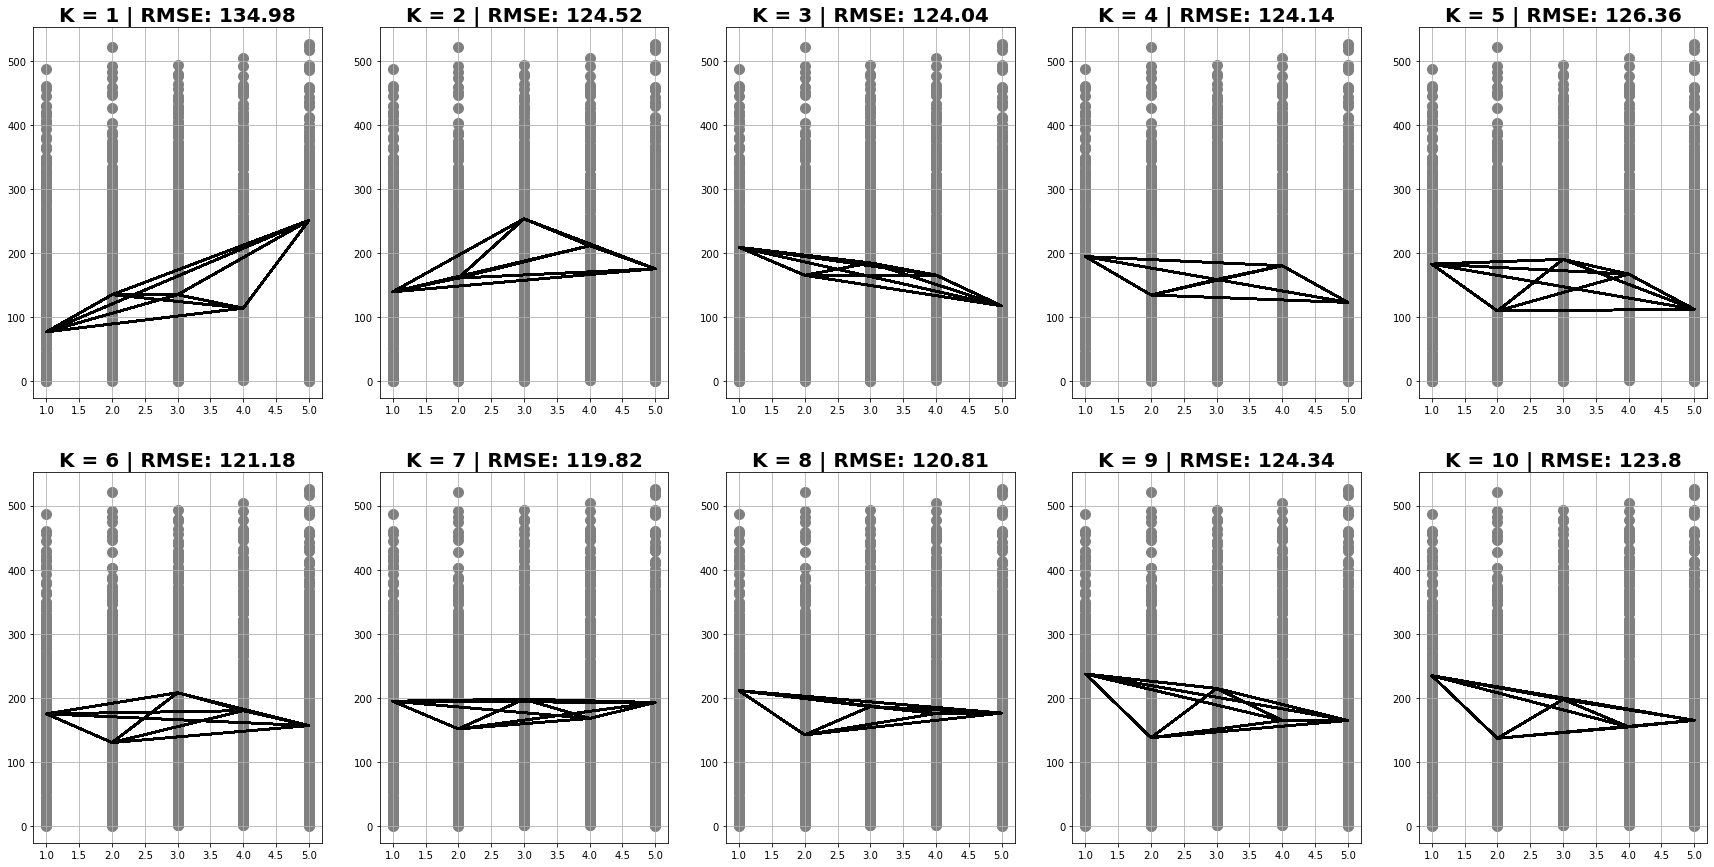

In [208]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df_treino['ind_pop_cid'], df_treino['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

In [209]:
X = df_treino['ind_pop_cid'].values.reshape(-1,1)
y = df_treino['crimes'].values
Xteste = df_teste['ind_pop_cid'].values.reshape(-1,1)
yteste = df_teste['crimes'].values

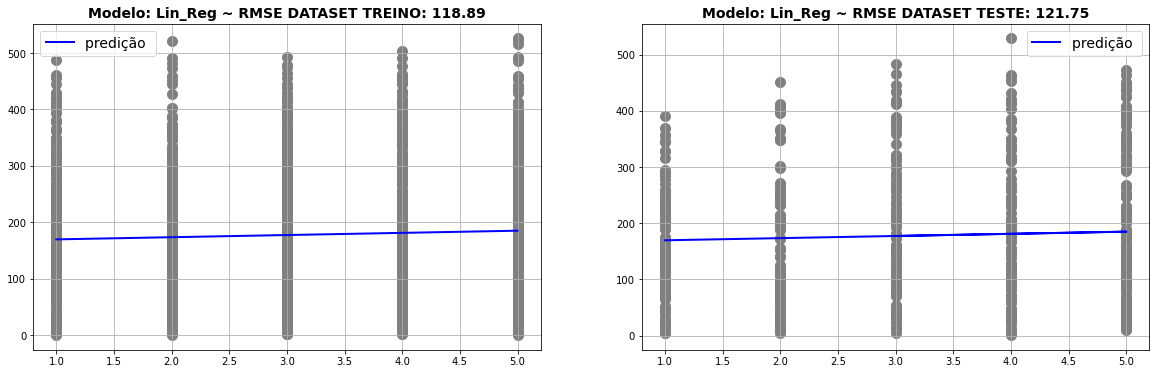

In [210]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

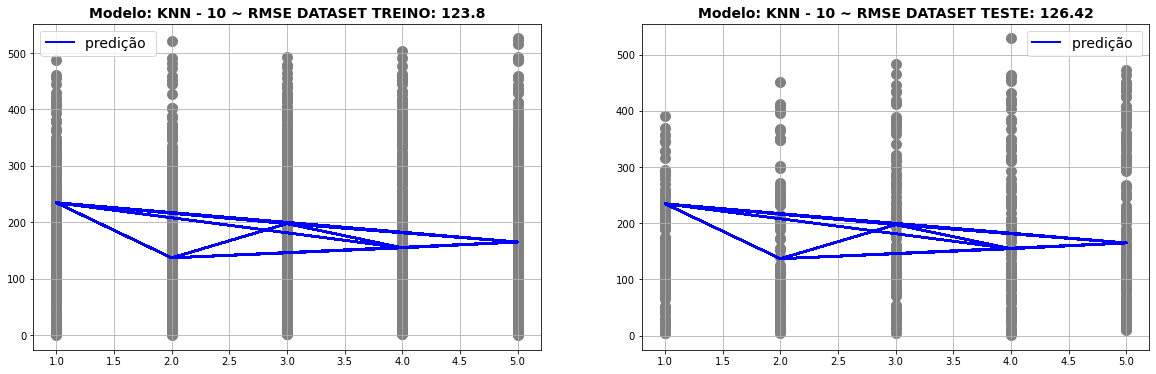

In [215]:
modelo = KNeighborsRegressor(n_neighbors = 10)
nome_modelo = 'KNN - 10'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

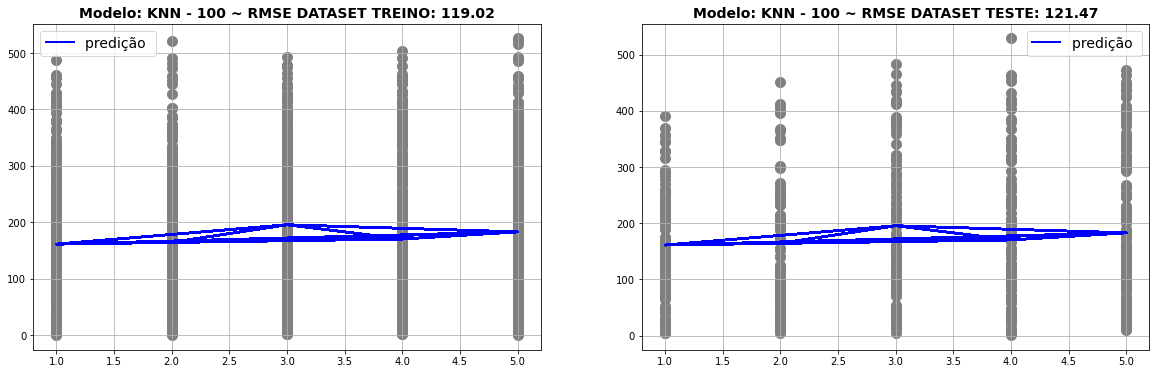

In [216]:
modelo = KNeighborsRegressor(n_neighbors = 100)
nome_modelo = 'KNN - 100'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

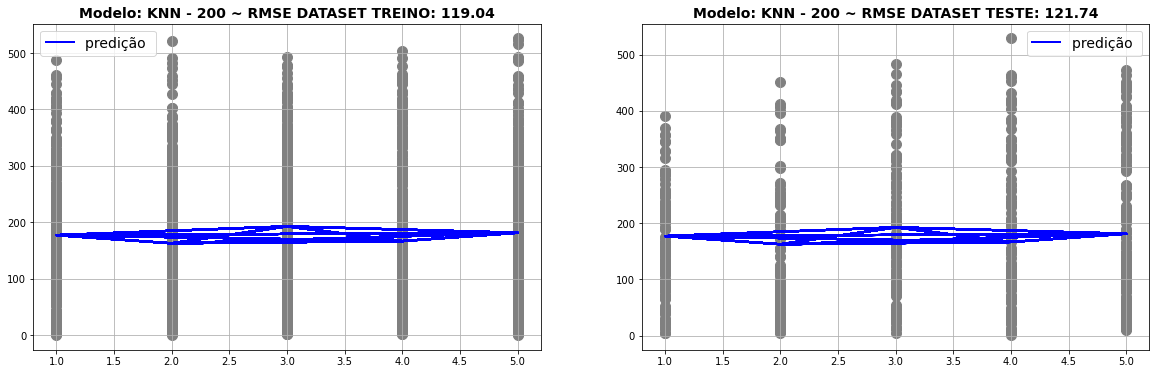

In [217]:
modelo = KNeighborsRegressor(n_neighbors = 200)
nome_modelo = 'KNN - 200'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

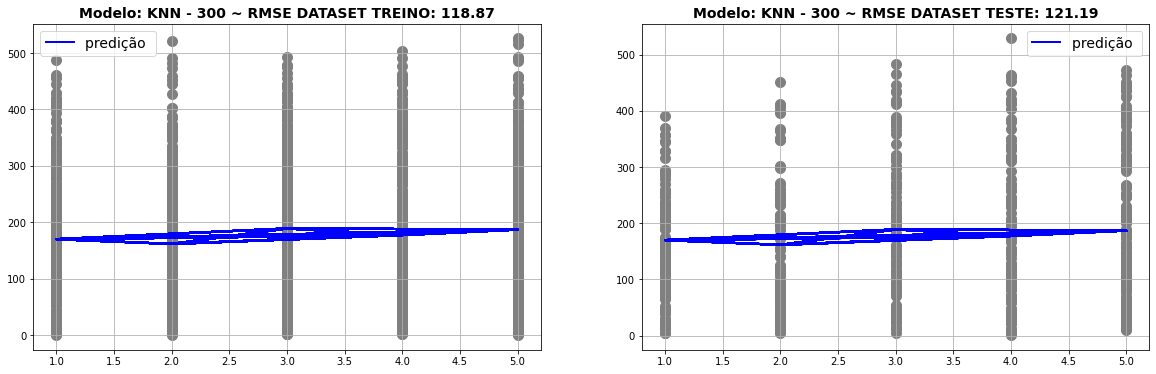

In [218]:
modelo = KNeighborsRegressor(n_neighbors = 300)
nome_modelo = 'KNN - 300'
plota_curva_regressao(X, y, Xteste, yteste, modelo, nome_modelo)

----

#### CONCLUSÃO:
No caso da regressão linear, em todas as variáveis vemos uma leve variação do RMSE no dataset de teste, mas os valores são similares. Além disso, fica evidente que a reta de regressão ainda descreve os dados de teste, mesmo tendo sido treinada apenas no dataset de treinamento.

Quanto aos resultados para versões do KNN - Regressor: Fica claro que neste modelo, a variável 'ind_pop_cid' sofre overfitting com menos de 300 vizinhos (K < 300).